In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("spam.csv", encoding='latin1')

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [8]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. MOdel building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace =True)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#renaming the columns
df.rename(columns={'v1':'Target','v2':'text'},inplace=True)

In [13]:
df.head()

,Target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [15]:
df['Target']=encoder.fit_transform(df['Target'])

In [16]:
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
#missing values
df.isnull().sum()

Target    0
text      0
dtype: int64

In [18]:
df.duplicated().sum()

403

In [19]:
df.drop_duplicates(keep='first')

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [20]:
df=df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(5169, 2)

# 2. EDA

In [23]:
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [25]:
import matplotlib.pyplot as plt

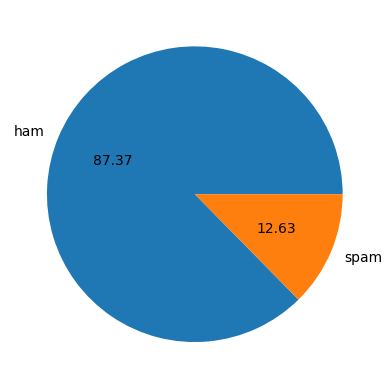

In [26]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

Data is imbalanced

In [27]:
import nltk

In [28]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\ASHISH
[nltk_data]     RAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [29]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [30]:
df['num_characters']=df['text'].apply(len)

In [31]:
df.head()

,Target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
df.head()

,Target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [35]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [36]:
df.head()

,Target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [37]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
#for ham messeges
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
#spam
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [40]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

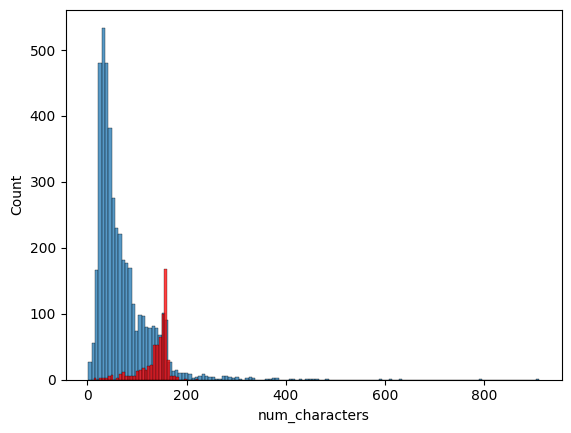

In [41]:
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

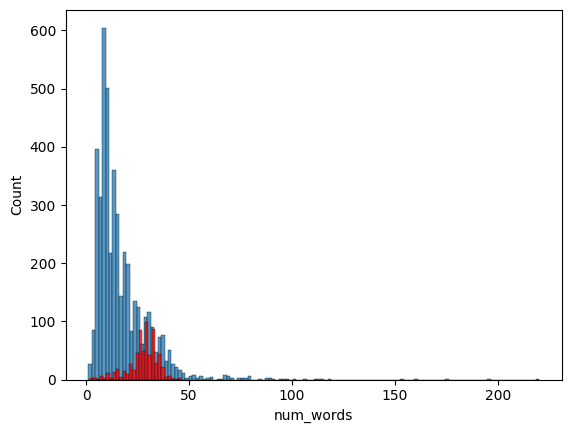

In [42]:
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

In [43]:
print(df.columns)


Index(['Target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')


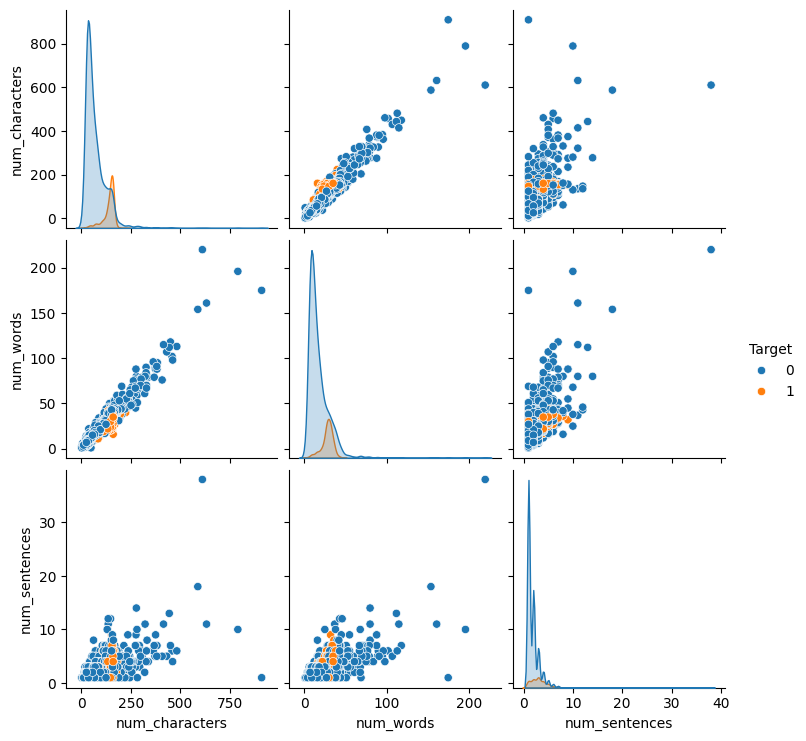

In [44]:
sns.pairplot(data=df,hue='Target')

In [45]:
print(df.dtypes)


Target             int32
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object


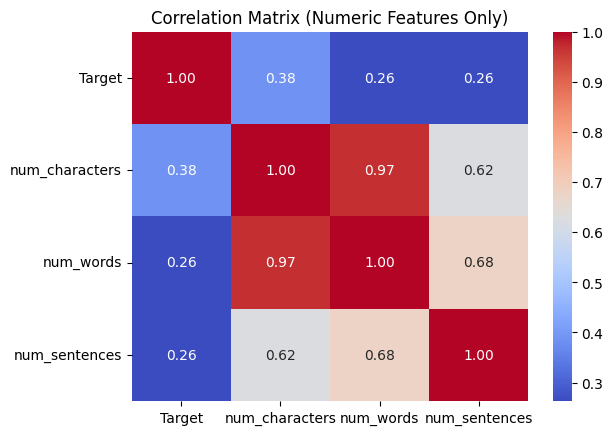

In [46]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'int32', 'float64'])

# Plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

# 3. Data Processing

Lower case

Tokenzation

Removing special Characters

Removing Stop words and punctuation

stemming


In [47]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    return text

In [48]:
transform_text("HI how ARE You")

['hi', 'how', 'are', 'you']

In [49]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [50]:
df['text'][0]


'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [51]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    return y

In [52]:
transform_text("hi HOW are you@#")

['hi', 'how', 'are', 'you']

In [53]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ASHISH
[nltk_data]     RAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [55]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [56]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text =y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    return y

In [57]:
transform_text("hi how are you AshiSh ##@")

['hi', 'ashish']

In [58]:
transform_text("Did you like my presentation on ML?")

['like', 'presentation', 'ml']

In [59]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [60]:
from nltk.stem.porter import PorterStemmer

In [61]:
ps=PorterStemmer()
ps.stem('loving')

'love'

In [62]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text =y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [63]:
transform_text("I loved the YT lectures On MAchine Learning. HOw about you?")

'love yt lectur machin learn'

In [64]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [65]:
transform_text("'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'")

'jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [66]:
df['transformed_text']=df['text'].apply(transform_text)

In [67]:
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [68]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white')

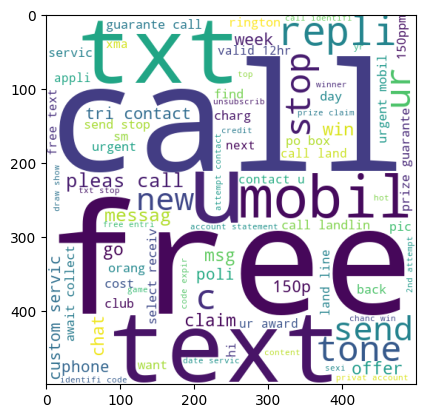

In [69]:
spam_wc= wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)


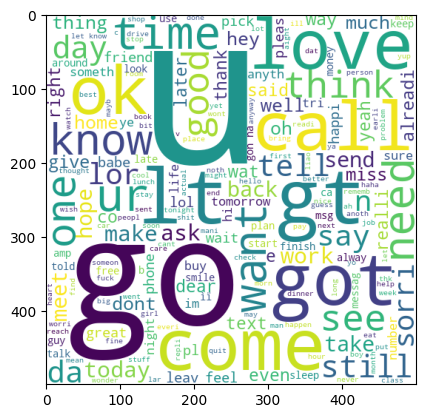

In [70]:
ham_wc= wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wc)


In [71]:
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [72]:
spam_corpus=[]
for msg in df[df['Target']==1]['transformed_text'].to_list():
    for words in msg.split():
        spam_corpus.append(words)

In [73]:
len(spam_corpus)

9939

In [74]:
from collections import Counter
top_words_spam=Counter(spam_corpus).most_common(30)
top_words_spam

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [75]:
dff=pd.DataFrame(top_words_spam,columns=['words','counts'])
dff

,words,counts
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


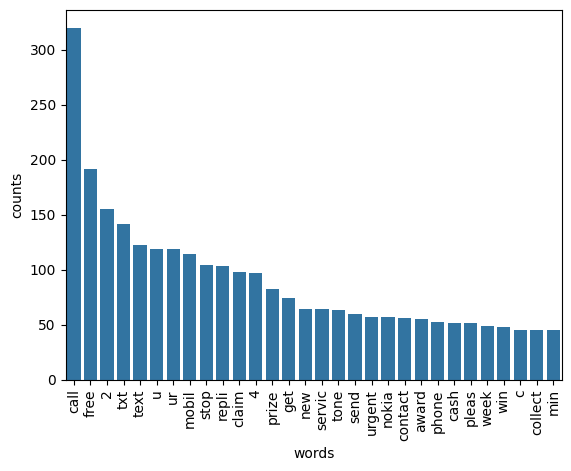

In [76]:
sns.barplot(x='words', y='counts', data=dff)
plt.xticks(rotation='vertical')
plt.show()

In [77]:
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [78]:
ham_corpus=[]
for msg in df[df['Target']==0]['transformed_text'].to_list():
    for words in msg.split():
        ham_corpus.append(words)

In [79]:
len(ham_corpus)

35404

In [80]:
from collections import Counter
top_words_ham=Counter(ham_corpus).most_common(30)
top_words_ham

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [81]:
dfff=pd.DataFrame(top_words_ham,columns=['words','counts'])
dfff

,words,counts
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


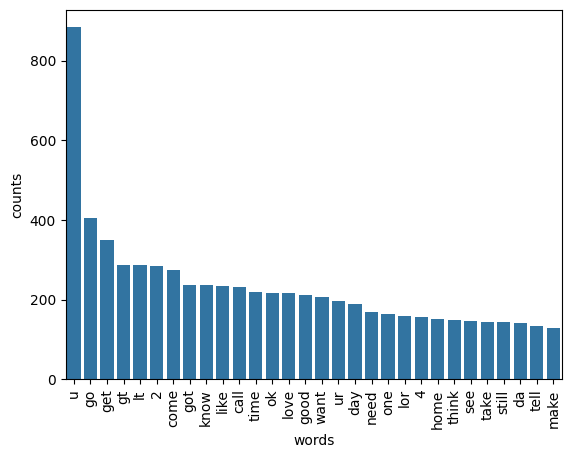

In [82]:
sns.barplot(x='words', y='counts', data=dfff)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [83]:
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [130]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [131]:
x= tfidf.fit_transform(df['transformed_text']).toarray()

In [132]:
x.shape

(5169, 3000)

In [133]:
y=df['Target'].values

In [134]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [137]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [138]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [139]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [140]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [141]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [118]:
### we will choose tfidf and mnb

In [142]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier

In [143]:
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')  # FIX: 'l1', not '11'
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)
# # Creating classifier objects with parameters
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# dtc = DecisionTreeClassifier(max_depth=5)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

In [144]:
clfs = {
    'NB'       : mnb,
    'LR'       : lrc,
    'RF'       : rfc,
    'XGB'      : xgb   # ✅ Added proper key name
#     'SVC'      : svc,
#     'KN'       : knc,
#     'DT'       : dtc,
#     'AdaBoost' : abc,
#     'BgC'      : bc,
#     'ETC'      : etc,
#     'GBDT'     : gbdt,
# 
}


In [145]:
def train_classifierr(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use average param for multi-class
    return accuracy, precision

In [146]:
train_classifierr(lrc, x_train, x_test, y_train, y_test)

(0.9584139264990329, 0.958885174964784)

In [147]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    acc, prec = train_classifierr(clf, x_train, x_test, y_train, y_test)
    
    print(f"For {name}:")
    print(f"  Accuracy  = {acc:.4f}")
    print(f"  Precision = {prec:.4f}")
    
    accuracy_scores.append(acc)
    precision_scores.append(prec)


For NB:
  Accuracy  = 0.9710
  Precision = 0.9719
For LR:
  Accuracy  = 0.9584
  Precision = 0.9589
For RF:
  Accuracy  = 0.9758
  Precision = 0.9760
For XGB:
  Accuracy  = 0.9671
  Precision = 0.9667


below dataframe is without max_features=3000

In [125]:
performance_df=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy":accuracy_scores,"Precison":precision_scores}).sort_values("Precison",ascending=False)

In [126]:
performance_df

,Algorithm,Accuracy,Precison
3,XGB,0.974855,0.974497
2,RF,0.971954,0.972833
0,NB,0.959381,0.961200
1,LR,0.951644,0.951170


In [127]:
performance_df1= pd.melt (performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,XGB,Accuracy,0.974855
1,RF,Accuracy,0.971954
2,NB,Accuracy,0.959381
3,LR,Accuracy,0.951644
4,XGB,Precison,0.974497
5,RF,Precison,0.972833
6,NB,Precison,0.961200
7,LR,Precison,0.951170


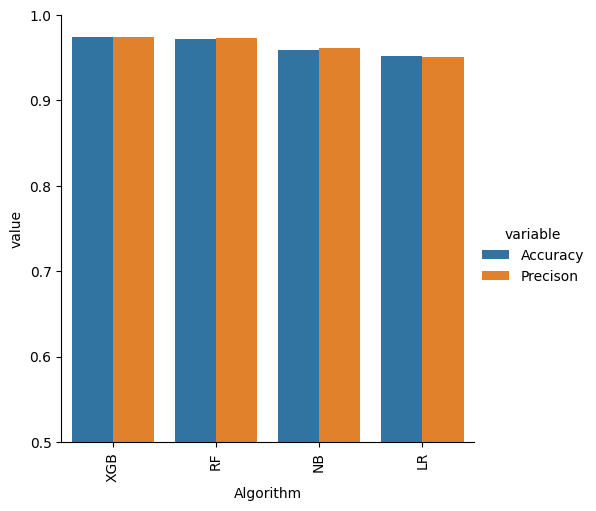

In [129]:
sns.catplot(data=performance_df1,x="Algorithm", y="value", hue="variable",kind="bar",height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [103]:
# model improve
# 1. change the max_features parameter of tfIdf

In [148]:
temp_df=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy_max_ft_3000":accuracy_scores,"Precison_max_fit_3000":precision_scores}).sort_values("Precison_max_fit_3000",ascending=False)

In [149]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precison,Accuracy_max_ft_3000,Precison_max_fit_3000
0,XGB,0.974855,0.974497,0.967118,0.966666
1,RF,0.971954,0.972833,0.975822,0.975984
2,NB,0.959381,0.961200,0.970986,0.971926
3,LR,0.951644,0.951170,0.958414,0.958885


Random Forest (RF) shows the best overall performance when max_features=3000:

Accuracy: 0.9758

Precision: 0.9760

Conclusion

Use Random Forest for the best balance of accuracy and precision at high feature count (e.g., TF-IDF with 3000 max features).
For faster training: Naive Bayes.
For best all-round performance: Random Forest or XGBoost.

### Applying other methods to improve model performance

1.Scaling

2.By adding extra column (no. of character)

In [170]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [151]:
x= tfidf.fit_transform(df['transformed_text']).toarray()


In [154]:
x
# so this output contain numbers somewere between
# so we can apply scalling

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler= MinMaxScaler()
# x=scaler.fit_transform(x)

In [171]:
# appending the num_characters col to x
x=np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [172]:
x.shape

(5169, 3001)

In [174]:
y=df['Target'].values


In [175]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [176]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [177]:
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')  # FIX: 'l1', not '11'
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [178]:
def train_classifierr(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use average param for multi-class
    return accuracy, precision

In [179]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    acc, prec = train_classifierr(clf, x_train, x_test, y_train, y_test)
    
    print(f"For {name}:")
    print(f"  Accuracy  = {acc:.4f}")
    print(f"  Precision = {prec:.4f}")
    
    accuracy_scores.append(acc)
    precision_scores.append(prec)


For NB:
  Accuracy  = 0.9739
  Precision = 0.9735
For LR:
  Accuracy  = 0.9652
  Precision = 0.9649
For RF:
  Accuracy  = 0.9691
  Precision = 0.9694
For XGB:
  Accuracy  = 0.9700
  Precision = 0.9696


In [164]:
temp_df2=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy_scaling":accuracy_scores,"Precison_scaling":precision_scores}).sort_values("Precison_scaling",ascending=False)

In [166]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [169]:
new_scaled_df=new_df.merge(temp_df2,on='Algorithm')
new_scaled_df


,Algorithm,Accuracy,Precison,Accuracy_max_ft_3000,Precison_max_fit_3000,Accuracy_scaling,Precison_scaling
0,XGB,0.974855,0.974497,0.967118,0.966666,0.967118,0.966666
1,RF,0.971954,0.972833,0.975822,0.975984,0.975822,0.975984
2,NB,0.959381,0.961200,0.970986,0.971926,0.978723,0.978435
3,LR,0.951644,0.951170,0.958414,0.958885,0.967118,0.967038


In [180]:
temp_df3=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy_num_char":accuracy_scores,"Precison_num_char":precision_scores}).sort_values("Precison_num_char",ascending=False)

In [181]:
new_num_char_df=new_scaled_df.merge(temp_df3,on='Algorithm')
new_num_char_df

,Algorithm,Accuracy,Precison,Accuracy_max_ft_3000,Precison_max_fit_3000,Accuracy_scaling,Precison_scaling,Accuracy_num_char,Precison_num_char
0,XGB,0.974855,0.974497,0.967118,0.966666,0.967118,0.966666,0.970019,0.969595
1,RF,0.971954,0.972833,0.975822,0.975984,0.975822,0.975984,0.969052,0.969439
2,NB,0.959381,0.961200,0.970986,0.971926,0.978723,0.978435,0.973888,0.973515
3,LR,0.951644,0.951170,0.958414,0.958885,0.967118,0.967038,0.965184,0.964907


In [84]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [85]:
x= tfidf.fit_transform(df['transformed_text']).toarray()


In [86]:
x.shape

(5169, 3000)

In [87]:
y=df['Target'].values


In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [91]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [92]:

# Define individual classifiers
nb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(eval_metric='logloss', random_state=42)


In [94]:

# Voting Classifier (soft voting recommended for probability-based models)
voting_clf = VotingClassifier(
    estimators=[
        ('nb', nb),
        ('rf', rf),
        ('xgb', xgb)
    ],
    voting='soft'  # Use 'hard' for majority class voting
)



In [95]:

# Fit on training data
voting_clf.fit(x_train, y_train)


,estimators,"[('nb', ...), ('rf', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None
,n_estimators,100


In [96]:

# Predict on test data
y_pred = voting_clf.predict(x_test)


In [97]:

# Evaluate
from sklearn.metrics import accuracy_score, precision_score


In [98]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Voting Classifier Accuracy: {accuracy:.4f}")
print(f"Voting Classifier Precision: {precision:.4f}")


Voting Classifier Accuracy: 0.9787
Voting Classifier Precision: 1.0000


## pipe line

1. text transform(preprocessing)
2. vectorization
3. algorithm apply

In [99]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting_clf,open('model.pkl','wb'))